# App review sentiment over time

In [21]:
# import packages
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime


from google_play_scraper import Sort, reviews, app
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



In [134]:
#from top2vec import Top2Vec

In [135]:
# set plot size
plt.rcParams['figure.figsize'] = [12, 10]
sns.set_theme()

Scrape reviews from United States of Tiktok 

In [136]:
# list of companies to scrape
app_list = [
    'com.thredup.android',
    'com.poshmark.app',
    'com.depop',
    'com.tradesy.android',
    'fr.vestiairecollective',
    'fr.vinted'
]



In [12]:
# scrape info for each company
app_info = []

for i in tqdm(app_list):
    info = app(i, lang = 'en', country = 'us')
    del info['comments']
    app_info.append(info)

100%|█████████████████████████████████████████████| 6/6 [00:02<00:00,  2.58it/s]


In [178]:
# make function to print organized JSON object
def print_json(json_object):
    json_str = json.dumps(
    json_object,
    indent = 4,
    default = str
    )
    
    print(json_str)

In [ ]:
print_json(app_info[3])

{
    "title": "Tradesy: Buy Designer Fashion",
    "description": "Tradesy is the leading peer-to-peer resale marketplace for buying and selling luxury and vintage fashion. Shop your favorite brands \u2014 including Chanel, Louis Vuitton, Gucci, Prada, Louboutin, Saint Laurent, Tiffany & Co., and more \u2014 up to 70% off with authenticity guaranteed. Tradesy believes in accessible and sustainable luxury fashion: sell what you have to buy what you want.\r\n\r\nDownload the Tradesy app today to get access to the best designer deals and create your own resale listings in minutes. Tradesy has everything that you need: luxury brands, vintage style, classic and even wedding fashion. Take your style to the next level with Tradesy.\r\n\r\nSELL WHAT YOU HAVE, BUY WHAT YOU LOVE\r\nPersonal style is a journey, not a destination \u2014 and Tradesy is with you every step of the way. We\u2019ve made it safe, simple, and fun to recirculate pre-owned clothing and accessories, which means you can sco

In [6]:
# scrape app reviews
app_reviews = []

for ap in tqdm(app_list):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
            ap,
            lang='en',
            country='us', # may want to look at other regions to get bigger picture
            sort=sort_order,
            #count = 50000
            count= 20000 if score == 3 else 20000,
            filter_score_with=score
            )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)
    

100%|████████████████████████████████████████████| 6/6 [15:28<00:00, 154.67s/it]


In [176]:
# read in csv file of scraped reviews
app_reviews = pd.read_csv('app_reviews.csv')

In [179]:
# check what a review object looks like
print_json(app_reviews[0])

KeyError: 0

In [26]:
# number of reviews
print(len(app_reviews))

# convert into dataframe
app_df = pd.DataFrame(app_reviews)



212255


In [27]:
# write to csv file so don't have to run the scrape every time (+15 min)
#app_df.to_csv('app_reviews.csv',index=False)

In [172]:
app_df.head(1)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,2c3ac098-8bb8-40c0-b182-735dd1eeaa36,_ _ (‪Tara‬),https://play-lh.googleusercontent.com/a-/AD5-W...,Horrible experience. You have to spend all the...,1,20,5.60.1,2023-01-10 00:27:23,NaN,NaN,most_relevant,com.thredup.android


In [12]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212255 entries, 0 to 212254
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              212255 non-null  object        
 1   userName              212255 non-null  object        
 2   userImage             212255 non-null  object        
 3   content               212196 non-null  object        
 4   score                 212255 non-null  int64         
 5   thumbsUpCount         212255 non-null  int64         
 6   reviewCreatedVersion  188268 non-null  object        
 7   at                    212255 non-null  datetime64[ns]
 8   replyContent          51086 non-null   object        
 9   repliedAt             51086 non-null   datetime64[ns]
 10  sortOrder             212255 non-null  object        
 11  appId                 212255 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 19

In [29]:
# drop columns related to replied and not related to score or appId, because they have many NaNs or are not relevant
clean_df = app_df.drop(['replyContent',
                        'repliedAt',
                        'userName',
                        'userImage',
                        'reviewCreatedVersion',
                        'sortOrder'
                       ], axis = 1, inplace = False)

In [30]:
clean_df.info()
# review Created Version is has some nulls, but the column may be useful because it contains the app's version

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212255 entries, 0 to 212254
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewId       212255 non-null  object
 1   content        212188 non-null  object
 2   score          212255 non-null  int64 
 3   thumbsUpCount  212255 non-null  int64 
 4   at             212255 non-null  object
 5   appId          212255 non-null  object
dtypes: int64(2), object(4)
memory usage: 9.7+ MB


In [31]:
# possible future analysis -> review created version for each app
# maybe group by app version and get sentiment for each version


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

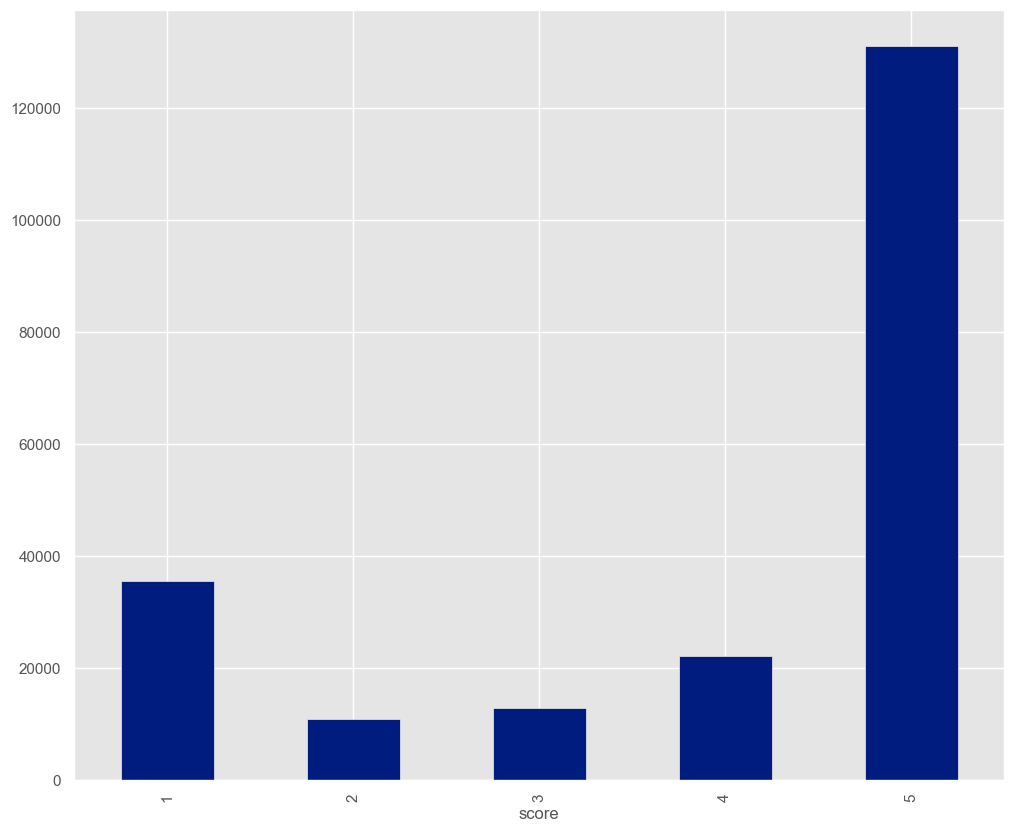

In [154]:
# count how many reviews pulled from each app

clean_df.groupby(['appId', 'score'])['reviewId'].count()
p=clean_df.groupby('score')['reviewId'].count().plot(kind='bar')

p.savefig('stars.png')

In [146]:

p_df = clean_df.copy()

# extract a combined month year key

p_df['month_year'] = pd.to_datetime(p_df['at']).dt.to_period('M')

p_df2 = p_df[['month_year', 'appId']].copy()

count_df = (p_df2.reset_index()
        .groupby(['month_year','appId'], as_index = False)
        .count()
        .rename(columns={'index':'count'})
       )

count_df.sort_values(['appId','month_year'], inplace = True)
count_df.head()
# extract depop data frame and plot 
depop_count = count_df.loc[count_df['appId'] == 'com.depop']

depop_count.index = depop_count['month_year']


# depop_count.plot()


In [147]:
# plot_df[:,0:2]

/var/folders/9w/pgtvqkvd63x2pq46czxybgmc0000gp/T/ipykernel_30181/2499541251.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


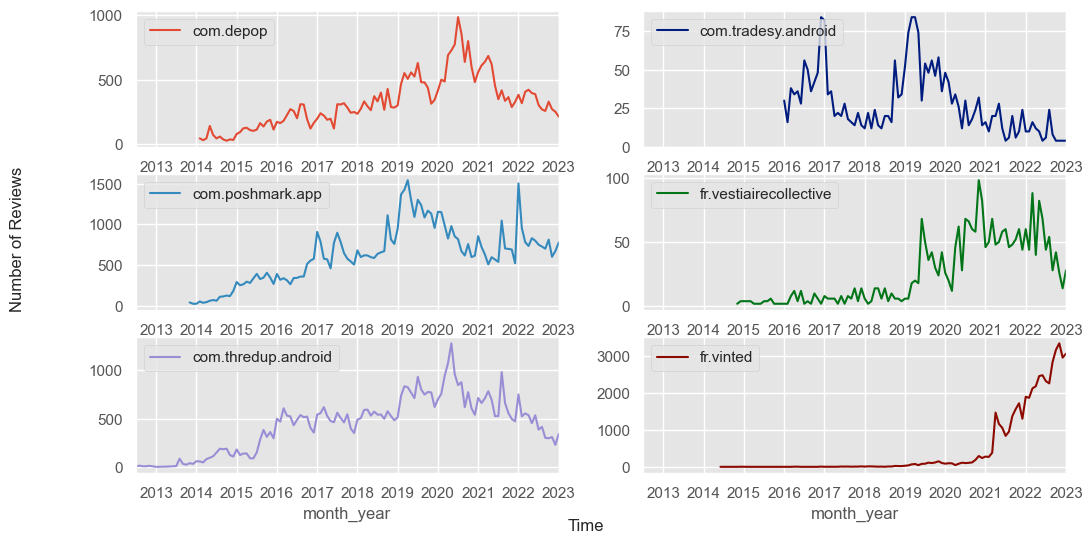

In [156]:
# subplot for each app


plot_df = pd.pivot_table(count_df.reset_index(),
               index='month_year', columns='appId', values='count'
              )#.plot(subplots=True)

plot_df = plot_df.ffill()

#plot_df.head()
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,6))

# plot first pandas frame in subplot style
df1 = plot_df.iloc[:, 0:3]
df2 = plot_df.iloc[:, 3:]

plt.style.use('ggplot')
df1.plot(ax = axes[:,0],subplots=True) 
# plot second pandas frame in subplot style
#sns.color_pallette('Set1',3)
plt.style.use('seaborn-dark-palette')
df2.plot(ax = axes[:,1],subplots=True)

fig.supxlabel('Time')
fig.supylabel('Number of Reviews')


plt.show()

In [158]:
fig.savefig("num_rev_time.png")

In [39]:
clean_df.groupby(['appId'])['at'].max()

# fill in missing dates with zero 

appId
com.depop                 2023-01-30 00:33:35
com.poshmark.app          2023-01-30 08:28:38
com.thredup.android       2023-01-30 05:27:25
com.tradesy.android       2022-10-16 21:39:00
fr.vestiairecollective    2023-01-27 16:15:43
fr.vinted                 2023-01-30 10:29:45
Name: at, dtype: object

In [144]:
# plot number of comments over time
# need to fix number of tick marks

# p = sns.relplot(
#     data = count_df,
#     x = count_df['month_year'].astype(str), y = 'count', col = "appId", hue = 'appId',
#     kind = "line", linewidth = 4, zorder = 2,
#     col_wrap = 2, height = 4, aspect = 2, legend = False
# )


In [145]:


# now in log scale
# p = sns.relplot(
#     data = count_df,
#     x = count_df['month_year'].astype(str), y = 'count', col = "appId", hue = 'appId',
#     kind = "line", linewidth = 4, zorder = 2,
#     col_wrap = 2, height = 4, aspect = 2, legend = False
# )

# start, end = p.get_xlim()
# p.set_axis_labels("Time", "Number of Reviews")

# iterate over axes of FacetGrid
# for ax in p.axes.flat:
#     labels = ax.get_xticklabels() # get x labels
#     for i,l in enumerate(labels):
#         if(i%12 == 0): labels[i] = '' # skip even labels
#     ax.set_xticklabels(labels, rotation=30) # set new labels
# plt.show()

#p.set(xticks=count_df['month_year'].astype(str)[2::50])
#p.set_xticks(range(len(count_df)/12))#, labels=range(2011, 2019))
#plt.xticks(np.arange(min(x), max(x)+1, 1.0))

# p.set_xticklabels(rotation=45)


# #p.set_xticks(np.arange(min(count_df['month_year']),max(count_df['month_year']), 12))

# p.set(yscale="log")


In [87]:
#  rolling mean of score for each app - simple sentiment analysis

roll_df = p_df.copy()

roll_df['day_month_year'] = pd.to_datetime(roll_df['at']).dt.to_period('D')

roll_df2 = roll_df[['appId','day_month_year', 'score']].copy()


#roll_df2 = roll_df2.sort_values(by=['appId', 'day_month_year'])
daily_mean = roll_df2.groupby(['appId', 'day_month_year'], as_index = False)['score'].mean()

/var/folders/9w/pgtvqkvd63x2pq46czxybgmc0000gp/T/ipykernel_30181/4282347313.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


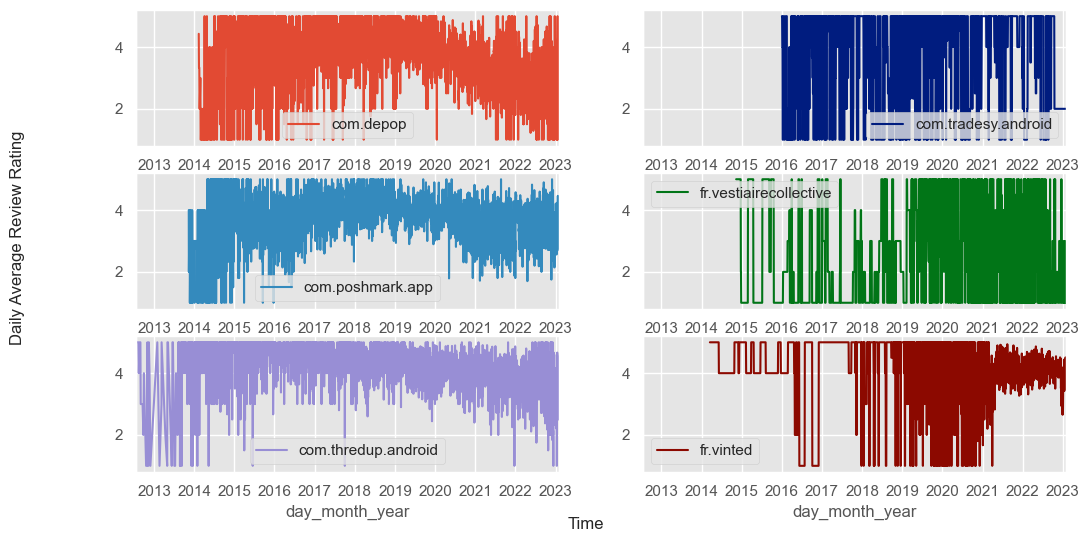

In [160]:
# plot mean review scores - daily
plot2_df = pd.pivot_table(daily_mean.reset_index(),
               index='day_month_year', columns='appId', values='score'
              )#.plot(subplots=True)

plot2_df = plot2_df.ffill()

#plot_df.head()
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,6))
# plot first pandas frame in subplot style
df1 = plot2_df.iloc[:, 0:3]
df2 = plot2_df.iloc[:, 3:]

plt.style.use('ggplot')
df1.plot(ax = axes[:,0],subplots=True) 
# plot second pandas frame in subplot style
#sns.color_pallette('Set1',3)
plt.style.use('seaborn-dark-palette')
df2.plot(ax = axes[:,1],subplots=True)

fig.supxlabel('Time')
fig.supylabel('Daily Average Review Rating')

plt.show()
fig.savefig('daily_avg_star.png')

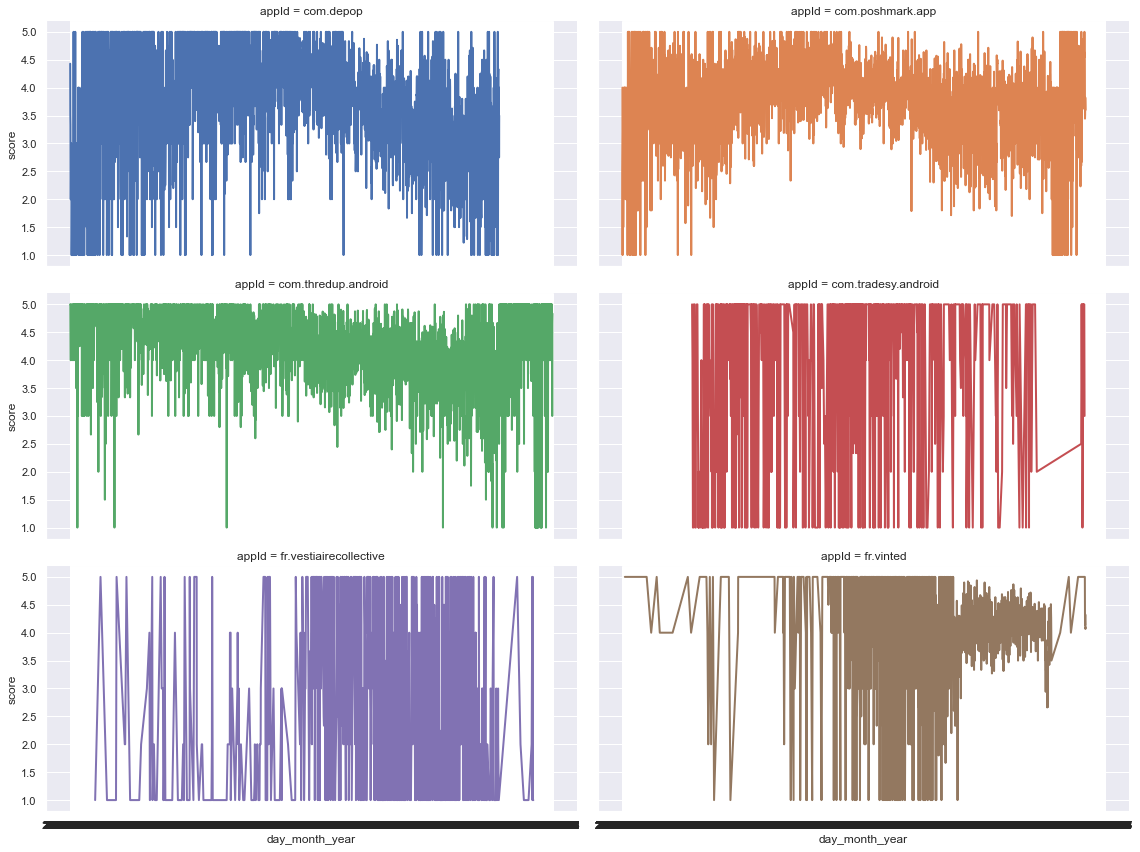

In [18]:

# plot daily review score mean for each app
score_p = sns.relplot(
    data = daily_mean,
    x = daily_mean['day_month_year'].astype(str), y = 'score', col = "appId", hue = 'appId',
    kind = "line", linewidth = 2, zorder = 2,
    col_wrap = 2, height = 4, aspect = 2, legend = False
)


In [18]:
daily_mean.head(5)

,appId,day_month_year,score
0,com.depop,2014-02-11,4.428571
1,com.depop,2014-02-12,3.500000
2,com.depop,2014-02-13,3.333333
3,com.depop,2014-02-17,2.000000
4,com.depop,2014-02-18,2.000000


/var/folders/9w/pgtvqkvd63x2pq46czxybgmc0000gp/T/ipykernel_30181/42032100.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


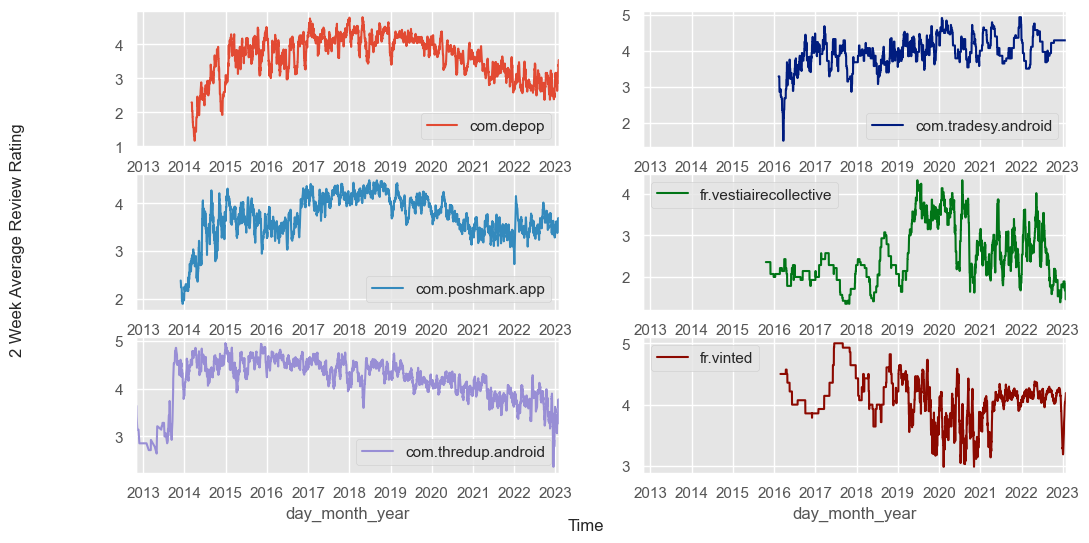

In [161]:
# smooth, take 2 week rolling average - include in presentation
daily_mean['2wk_avg'] = daily_mean.groupby('appId').rolling(14)['score'].mean().reset_index(drop=True)

# plot
plot2_df = pd.pivot_table(daily_mean.reset_index(),
               index='day_month_year', columns='appId', values='2wk_avg'
              )#.plot(subplots=True)

plot2_df = plot2_df.ffill()

#plot_df.head()
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,6))

df1 = plot2_df.iloc[:, 0:3]
df2 = plot2_df.iloc[:, 3:]

# plot first pandas frame in subplot style
plt.style.use('ggplot')
df1.plot(ax = axes[:,0],subplots=True) 
# plot second pandas frame in subplot style
#sns.color_pallette('Set1',3)
plt.style.use('seaborn-dark-palette')
df2.plot(ax = axes[:,1],subplots=True, kind='line')

fig.supxlabel('Time')
fig.supylabel('2 Week Average Review Rating')

plt.show()
fig.savefig('2wk_avg_star.png')

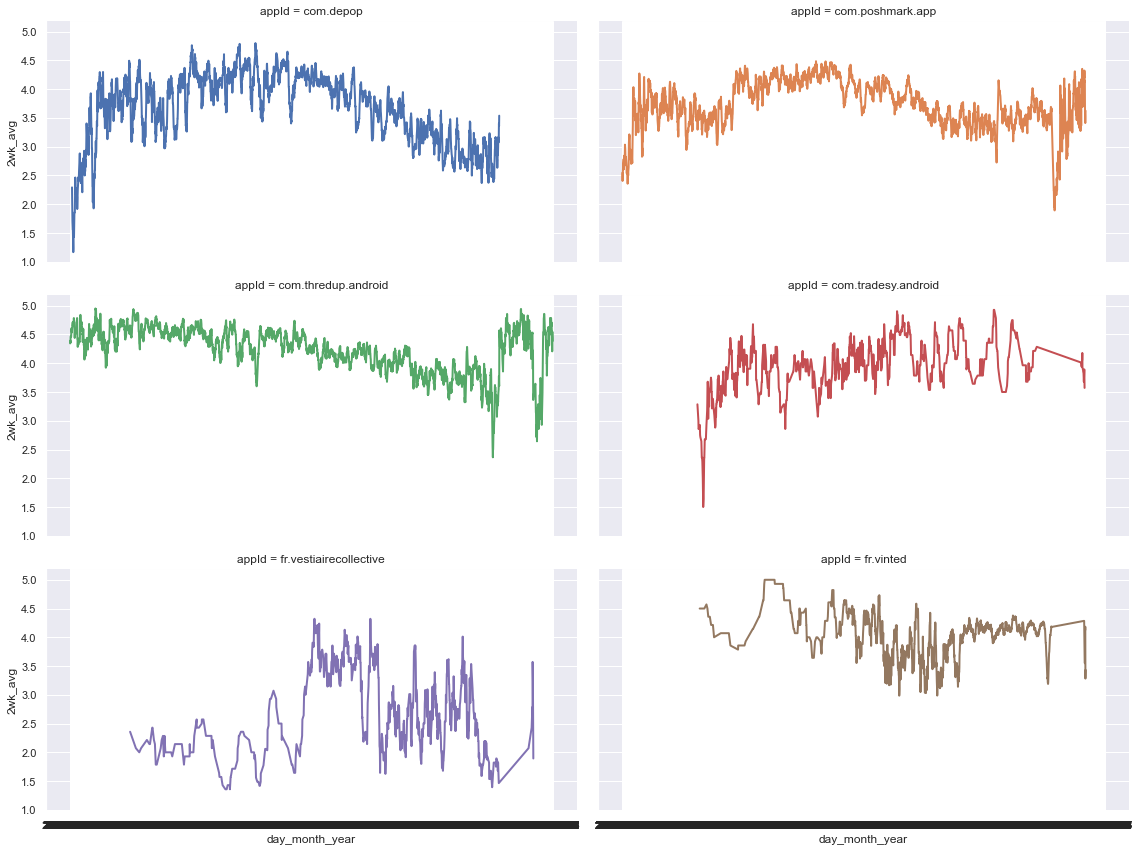

In [147]:
# now smooth, take 2 week rolling average - include in presentation
daily_mean['2wk_avg'] = daily_mean.groupby('appId').rolling(14)['score'].mean().reset_index(drop=True)

moving_score_p = sns.relplot(
    data = daily_mean,
    x = daily_mean['day_month_year'].astype(str), y = '2wk_avg', col = "appId", hue = 'appId',
    kind = "line", linewidth = 2, zorder = 2,
    col_wrap = 2, height = 4, aspect = 2, legend = False
)

/var/folders/9w/pgtvqkvd63x2pq46czxybgmc0000gp/T/ipykernel_30181/3566609953.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


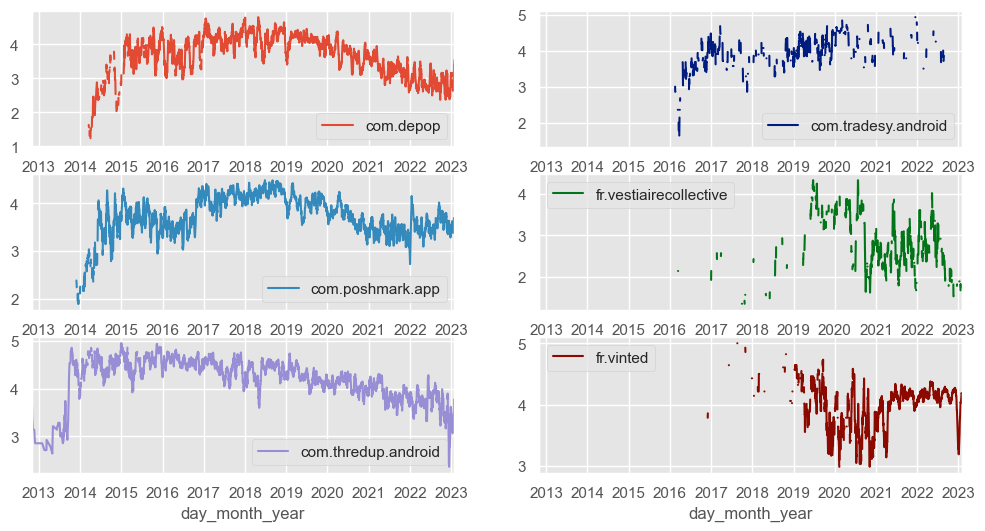

In [98]:
# now smooth, take 30 day rolling average - don't include in presentation
daily_mean['month_avg'] = daily_mean.groupby('appId').rolling(30)['score'].mean().reset_index(drop=True)

# plot
plot3_df = pd.pivot_table(daily_mean.reset_index(),
               index='day_month_year', columns='appId', values='month_avg'
              )#.plot(subplots=True)

plot3_df = plot3_df.ffill()

#plot_df.head()
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,6))

df1 = plot2_df.iloc[:, 0:3]
df2 = plot2_df.iloc[:, 3:]

# plot first pandas frame in subplot style
plt.style.use('ggplot')
df1.plot(ax = axes[:,0],subplots=True) 
# plot second pandas frame in subplot style
#sns.color_pallette('Set1',3)
plt.style.use('seaborn-dark-palette')
df2.plot(ax = axes[:,1],subplots=True, kind='line')

plt.show()

# moving_month_score_p = sns.relplot(
#     data = daily_mean,
#     x = daily_mean['day_month_year'].astype(str), y = 'month_avg', col = "appId", hue = 'appId',
#     kind = "line", linewidth = 2, zorder = 2,
#     col_wrap = 2, height = 4, aspect = 2, legend = False
# )

In [99]:
# VADER sentiment analysis - designed and trained for social media texts
sentAnalyser = SentimentIntensityAnalyzer()

In [165]:
# function to extract sentiment from each review
def calculate_sentiment(comment):
    # Run VADER on the reviews
    scores = sentAnalyser.polarity_scores(comment)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [101]:
# check if there are any NaN comments
clean_df.loc[clean_df['content'] == None].count().iloc[0]
print(sum(x is None for x in clean_df['content']))
print(sum(x is None for x in clean_df['at']))
clean_df = clean_df[clean_df['content'].notnull()]

0
0


In [102]:
# Apply the function to every row in the "content" column and output the results into a new column "sentiment_score"
clean_df['sentiment_score'] = clean_df['content'].apply(calculate_sentiment)

In [171]:
good = "I think this app is good, the clothes came right on time"
print(calculate_sentiment(good))
bad = "The clothes came late, would not recommend"
print(calculate_sentiment(bad))

0.4404
-0.2755


In [104]:
# now get rolling average for sentiment over time
sen_df = clean_df[['at','appId','sentiment_score']].copy()

sen_df['day_month_year'] = pd.to_datetime(sen_df['at']).dt.to_period('D')

sen_daily_mean = sen_df.groupby(['appId', 'day_month_year'], as_index = False)['sentiment_score'].mean()

# now smooth, take 2 week rolling average - include in presentation
sen_daily_mean['2wk_avg_sen'] = sen_daily_mean.groupby('appId').rolling(14)['sentiment_score'].mean().reset_index(drop=True)



/var/folders/9w/pgtvqkvd63x2pq46czxybgmc0000gp/T/ipykernel_30181/1698693893.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


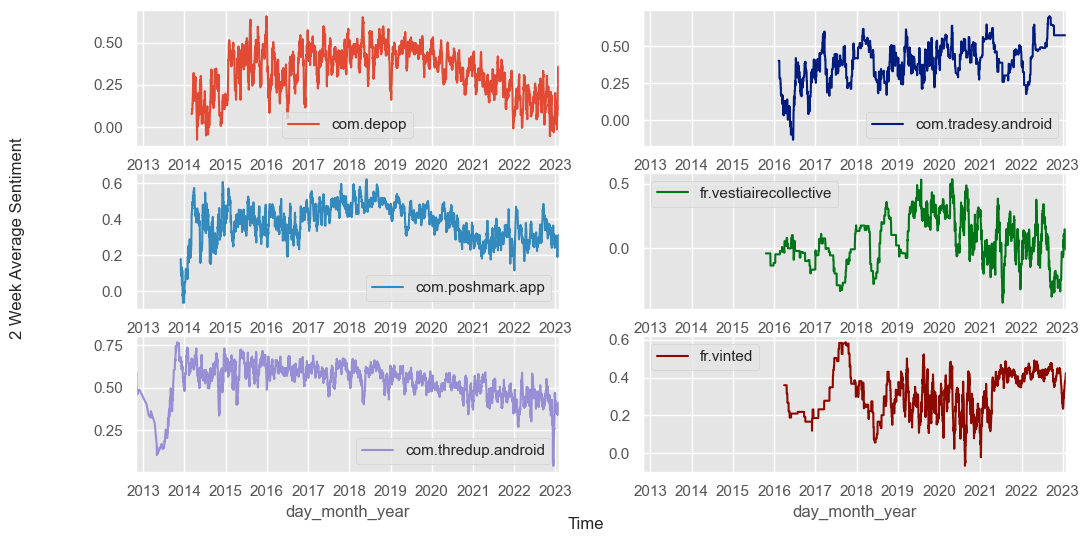

In [162]:

# plot rolling 2 week sentiment
plot4_df = pd.pivot_table(sen_daily_mean.reset_index(),
               index='day_month_year', columns='appId', values='2wk_avg_sen'
              )


plot4_df = plot4_df.ffill()

fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,6))

df1 = plot4_df.iloc[:, 0:3]
df2 = plot4_df.iloc[:, 3:]


# plot first pandas frame in subplot style
plt.style.use('ggplot')
df1.plot(ax = axes[:,0],subplots=True) 
# plot second pandas frame in subplot style
#sns.color_pallette('Set1',3)
plt.style.use('seaborn-dark-palette')
df2.plot(ax = axes[:,1],subplots=True, kind='line')

fig.supxlabel('Time')
fig.supylabel('2 Week Average Sentiment')

plt.show()
fig.savefig('2wk_avg_sentiment.png')

In [121]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [93]:
# topic modeling with top2vec - use google's USE (universal-sentence-encoder), could be interesting if used BERT instead
#documents = clean_df.content.values.tolist()
documents = clean_df.copy()

documents['content'] = documents['content'].astype(str)
docs = documents['content'].to_numpy()

In [94]:
type(docs)
docs[0]

"Horrible experience. You have to spend all the time hunting down what you want and then you lose it every 1 to 4 hours. Finally get to place your orders and the stuff never comes! Just an oops, sorry. First issue, took like 3 weeks for an order to get here, second time, lost the whole order, this time, missing item that I wanted most in order. But new, you may not get what you order and then they'll just resell it and call it a day. Horrible company and horrible experience multiple times."

In [119]:
# could further analyze with top2vec, topic analysis